In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline
from my_plot import set_size
import seaborn as sns
width =  508.0
widthcol = 244
plt.rcParams['font.size']=12

from matplotlib.ticker import LogLocator

%matplotlib widget

In [2]:
def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        coefficient=float(coefficient)
        if (coefficient == 1.00):
            return f"$ 10^{{{exponent}}}$"  # Notazione LaTeX
        else: 
            return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX

In [3]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.72548 #K

In [4]:
folder = 'outputs/check-greens'
file_path = os.path.join(folder, "Dn_0.delta-z_Greens_z_h_394.dat")
HC = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)
x = HC.iloc[:, 0].values
DI = (HC.iloc[:, 4].values)
DI_N = (HC.iloc[:, 5].values)

In [5]:

file_path = os.path.join(folder, "Dn.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
x_ct = HC.iloc[:, 0].values
DI_ct = (HC.iloc[:, 4].values)
DI_N_ct = (HC.iloc[:, 5].values)

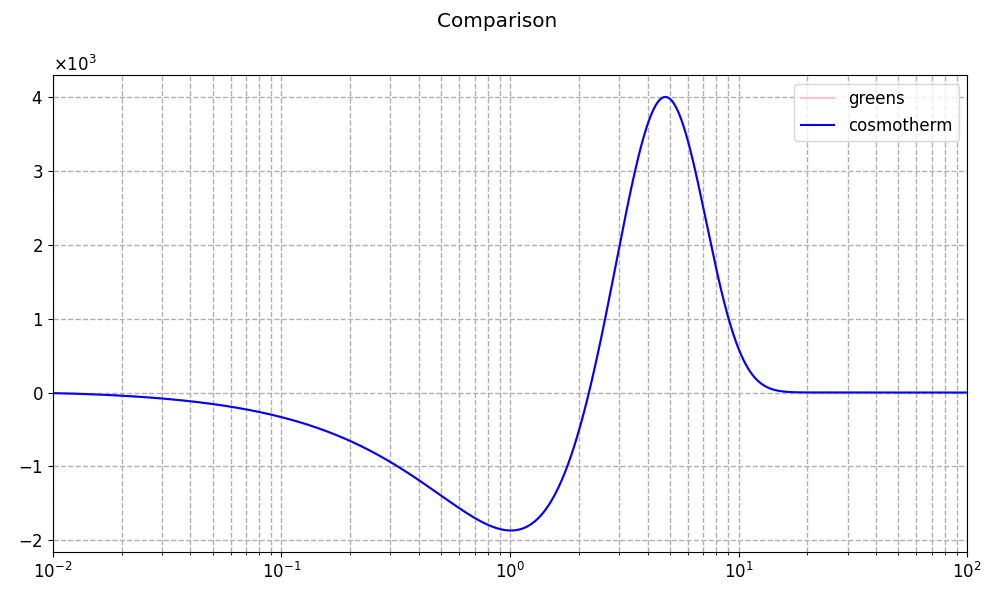

In [11]:
#Comparison CosmoTherm Data with and without temperature shift
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Comparison ")

#for i in range (len(Yn)):
#    ax1.plot(xynG[i],DIynG[i], label = f"Y{Yn[i]}", color = colors(i))

ax1.plot(x,DI_N, label = "greens", color= "pink")
ax1.plot(x_ct,DI_N_ct, label = "cosmotherm", color= "blue")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

We can concude that CosmoTherm and Greens function result are the same

###